## Introduction

This notebook shows how to automatically download LINZ (Land Information New Zealand) tide gauge data from https://sealevel-data.linz.govt.nz/tidegauge

## Install necessary python libraries

First install some python libraries, if not already installed in your current python environment.

In [2]:
import sys
!{sys.executable} -m pip install GitPython pandas requests xarray

## Download data

Download LINZ data to a local folder, here defined as `"/tmp/linz/raw"`. The script downloads and concatenates the daily files of hourly sea level data and saves as NetCDF file. The site information/readme is saved as ascii txt file. The example bellow gets data from Auckland (AUCT) station from 1st January 2013 to 1st January 2018.

In [4]:
sys.path.append('../../timeseries_processing/linz_waterlevel')
from linz_download import LINZ_Site
import os
from datetime import datetime

# user-defined: output folder and file names, time period to download data
site_name = "AUCT"
outdir = f"/tmp/linz/raw/{site_name}"
output_file = f"{outdir}/{site_name}_raw.nc"
readme_file = f"{outdir}/{site_name}_readme.txt"
tstart = datetime(2013, 1, 1)
tend = datetime(2018, 1, 1)

# create output folder (if not existent already)
if not os.path.isdir(outdir):
    os.makedirs(outdir)

# download LINZ data
site = LINZ_Site(site_name, tstart=tstart, tend=tend)
print('downloading data')
site.get_data()
print('saving to netcdf')
site.to_netcdf(output_file)
print('downloading readme')
site.get_readme(readme_file)

downloading data
Year:  2013
Failed downloading on /tmp/tmpylrg_a9s/AUCT_40_2013326.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_2013326.zip</Key><RequestId>KSCTRZKT85HC4ANM</RequestId><HostId>wmo6BzUCgvO0ZbfLWPMPxwor0vZ5wo9rAZcEQdzTDlZgOx4+nt5TDW9dICF2h4exc5x4GeG79Kw=</HostId></Error> 404
Failed downloading on /tmp/tmpylrg_a9s/AUCT_40_2013327.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_2013327.zip</Key><RequestId>KSCM6XGKR6PR40P2</RequestId><HostId>AaNLLqhc+o3qk75KjW5AdCkOV32yV/q38lKhqKLScmJ/50lBX0P351/PzZ3JRekGOmestlKt2+U=</HostId></Error> 404
Failed downloading on /tmp/tmpylrg_a9s/AUCT_40_2013328.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/40/AUCT_40_20

Failed downloading on /tmp/tmpylrg_a9s/AUCT_41_2013332.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/41/AUCT_41_2013332.zip</Key><RequestId>S7V8DRF8DZP056E7</RequestId><HostId>fE2nTXMEh0PRKA6Je35PgkZkeVuC3AFd082cqsUhr5LNTv1uzI8gy4qfvn6yggowLHtXFfhBs+PjceDNBw5F+A==</HostId></Error> 404
Failed downloading on /tmp/tmpylrg_a9s/AUCT_41_2013333.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/41/AUCT_41_2013333.zip</Key><RequestId>S7V8CSDPV2CX033H</RequestId><HostId>nk8AECVjN9EJA3W9gIOqlMZZeCr0dRYNJ2DhcESPca2L6R5uImpNEwTpct+ZTkYuMO3Ry09Slc4=</HostId></Error> 404
Failed downloading on /tmp/tmpylrg_a9s/AUCT_41_2013334.zip
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>tidegauge/AUCT/2013/41/AUCT_41_2013334.zip</Key><R

Load and plot the downloaded sea level data for both sensors.

<xarray.Dataset>
Dimensions:    (time: 2596567, sensor: 2, site: 1)
Coordinates:
  * time       (time) datetime64[ns] 2013-01-01 ... 2018-01-01T23:59:00
  * sensor     (sensor) int64 40 41
Dimensions without coordinates: site
Data variables:
    elev       (sensor, time) float32 ...
    longitude  (site) float64 ...
    latitude   (site) float64 ...
Attributes:
    site_name:      AUCT
    location_name:  Auckland


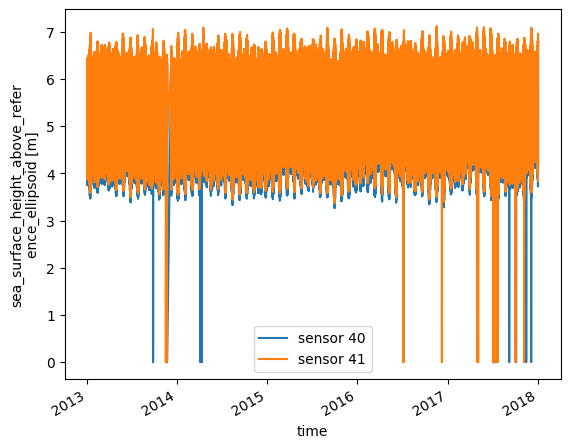

In [5]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(output_file)

print(ds)

ds.elev.sel(sensor=40, drop=True).plot(label='sensor 40');
ds.elev.sel(sensor=41, drop=True).plot(label='sensor 41');
plt.legend(loc='best');